<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/HonGong_ML_DL/6_Feature_engineering_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학과 규제

### **키워드:** 다중 회귀, 특성 공학, 릿지, 라쏘, 하이퍼파라미터

여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용해 보자.

복잡한 모델의 과대적합(Over-fitting)을 막기 위한 Lasso와 Ridge 회귀를 알아보자.

In [76]:
# Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt

## 다중 회귀(Multiple Regression)



#### 여러 개의 특성을 사용한 선형 회귀

- n개의 특성을 활용하면 n차원의 결정 경계를 만들게 된다. 
 <br>(ex-2개 특성 사용 시 2차원의 평면 결정 경계 형성)

<br>

$Target = a \times feature_1 + b \times feature_2 + bias$

## 특성 공학(Feature Engineering)



#### 기존의 특성을 사용하여 새로운 특성을 만들어내는 과정
\* 여러 특성 중 일부 특성을 골라내는 단순 추출의 경우 특성 선택(feature selection)이라고 부른다.

## 데이터 준비

In [50]:
# features: length, height, width
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy() # csv to numpy array

In [51]:
# target data
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [52]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42) # test size=None >> 0.25

In [53]:
# Scikit-learn's transformer class
poly_sample = PolynomialFeatures()
poly_sample.fit([[2,3]]) # sample
print(poly_sample.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


- fit(): 새롭게 만들 특성 조합 찾기
- transform(): 데이터 변환
- 두 메서드를 이어붙인 fit_transform() 메서드 사용가능

#### [[2, 3]] >> [[1. 2. 3. 4. 6. 9.]] 이유
1. PolynomialFeatures 클래스는 기본적으로 각 특성을 곱한 항과 제곱항을 기존 특성 셋에 추가한다.
> $2 \times 3 = 6$
>
> $2^2 = 4$
>
>$3^2=9$

2. 기본적으로 bias는 $1\times ?$ 형태인데, 따로 추가해주지 않을 경우 자동으로 1이 추가된다.
> `include_bias=False` 옵션으로 제외 가능

  \* 명시적으로 제외옵션을 지정하지 않아도 사이킷런 모델은 자동 추가된 절편항을 무시한다.  

In [54]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
print(train_poly.shape)

(42, 9)


In [55]:
# 9개 특성 조합 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [56]:
# test set 변환
test_poly = poly.transform(x_test)

## 다중 회귀 모델 훈련

#### LinearRegression과 비교


In [57]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [58]:
# train set 점수
print(lr.score(train_poly, y_train))

0.9903183436982124


In [59]:
# test set 점수
print(lr.score(test_poly, y_test))

0.9714559911594132


앞서 농어의 길이만을 사용했을 때와 달리 과소적합이 일어나지 않았음을 확인할 수 있다.

특성을 더 추가해서 사용해보도록 하자. `PolynomialFeatures` 클래스의 `degree` 파라미터를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다.

In [60]:
poly = PolynomialFeatures(degree=5, include_bias=False) # 최고차항 5차
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)

In [61]:
print(train_poly.shape)
poly.get_feature_names_out()

(42, 55)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [62]:
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))

0.9999999999991096


In [63]:
print(lr.score(test_poly, y_test))

-144.40579242335605


train set에 대한 정확도는 좋게 나오고 있으나, test set에 대한 정확도는 굉장히 큰 음수가 나오는 것을 확인할 수 있다.

이처럼 데이터 대비 특성의 개수가 너무 많아지면 선형 모델이 너무 강력해져 과대 적합을 이루게 되고, test set에서 형편 없는 점수를 내게 된다.

특성을 줄여서 과대 적합을 줄이는 방법도 있지만, 간혹 특성을 줄이면 전반적인 성능이 좋지 않게 나오게 되는 경우가 있다. 이러한 상황에서는 특성의 개수는 유지하되 과대 적합을 방지하기 위해 규제를 사용한다.

## 규제 (Regularization)


규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것으로, 선형 회귀 모델의 경우 특성에 곱해지는 계수를 작게 하는 역할을 한다.


일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르다면 공정하게 제어되지 않는다. 따라서 규제를 적용하기 전 정규화를 시키는 것이 일반적이다.

사이킷런에서 제공하는 변환기 중 하나인 `StandardScaler`클래스를 활용해보자 

In [64]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [67]:
# train set에서 학습된 평균과 표준편차
# print(ss.mean_)
# print(ss.scale_)

선형 회귀 모델에 규제를 추가한 모델은 **릿지**와 **라쏘**라고 부른다.

두 모델은 규제를 가하는 방법이 각각 다른데, 릿지는 계수를 제곱한 값을 기준으로 규제를 가하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

두 알고리즘 모두 계수의 크기를 줄이지만 라쏘의 경우 아예 0으로 만들 수도 있다.

모든 특성을 살리려는 경우가 많기에 일반적으로는 릿지가 더 선호된다.

### 릿지 회귀(Ridge Regression)



앞서 준비한 `train_scaled` 데이터로 릿지 모델을 훈련시켜보자

In [72]:
ridge = Ridge()
ridge.fit(train_scaled, y_train)

Ridge()

In [73]:
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9896101671037343
0.9790693977615397


많은 특성을 사용했음에도 불구하고 train set에 과대 적합 되지 않고 test set에서도 좋은 성능을 보이고 있다.

### 라쏘 회귀(Lasso Regression)

In [74]:
lasso = Lasso()
lasso.fit(train_scaled, y_train)

Lasso()

In [75]:
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.989789897208096
0.9800593698421883


### 규제 강도 alpha

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 이때 사용되는 하이퍼파라미터는 alpha로, 모델 객체 생성 시 설정할 수 있다.

alpha 값이 크면 규제의 강도가 세져 계수의 값을 더 큰 폭으로 줄이게 되고, 반대로 alpha 값이 작으면 규제의 강도를 낮춰 기본 선형 회귀 모델과 유사하게 된다.


최적의 alpha 값을 찾기 위해서는 alpha 값에 대한 $R^2$ 값의 그래프를 그려봐야 하는데, 이때 train set와 test set의 점수가 가장 가까운 지점을 최적의 alpha 값이라고 한다.

In [82]:
# Ridge
train_score = []
test_score = []

alpha_list = [0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, y_train)
  train_score.append(ridge.score(train_scaled, y_train))
  test_score.append(ridge.score(test_scaled, y_test))

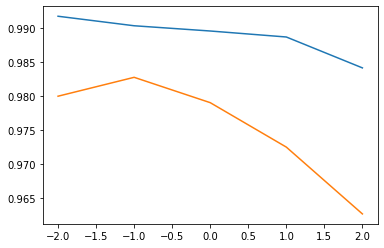

In [83]:
plt.plot(np.log10(alpha_list), train_score) # 간격 일정하게
plt.plot(np.log10(alpha_list), test_score)
plt.show()

적절한 alpha의 값은 -1.0, 즉 $10^{-1} = 0.1$이다. 

In [84]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)

Ridge(alpha=0.1)

In [85]:
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9903815817570366
0.9827976465386927


In [92]:
# Lasso
train_score = []
test_score = []

alpha_list = [0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=1_000_000)
  lasso.fit(train_scaled, y_train)
  train_score.append(lasso.score(train_scaled, y_train))
  test_score.append(lasso.score(test_scaled, y_test))

\* 라쏘 모델 훈련 시 `ConvergenceWarning`이 발생할 수 있다. 이는 사이킷런의 라쏘 모델의 동작 방식과 연관 있는데, 최적의 계수를 찾기 위해 반복적인 계산을 수행하는 모델 특성상 지정한 반복 횟수가 부족한 경우 발생한다. 이 경우 `max_iter`를 늘림으로써 해결할 수 있다.

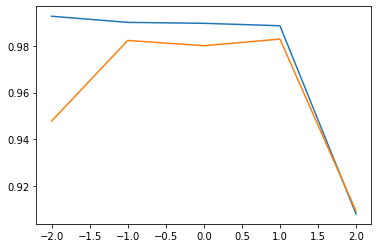

In [93]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

적절한 alpha의 값은 1.0, 즉 $10^{1} = 10$이다. 

In [94]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, y_train)

Lasso(alpha=10)

In [95]:
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9888067471131867
0.9824470598706695


앞서, 라쏘 모델은 계수 값을 아예 0으로 만들어버리는 경우도 있다고 언급하였다.

`coef_` 속성을 통해 모델의 계수를 확인해보도록 하자.

In [98]:
print(lasso.coef_)
print(np.sum(lasso.coef_ == 0))

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
40


55개 특성 중 40개의 특성의 계수가 0임을 확인할 수 있다.

이러한 특징 덕에 라쏘는 feature selection에서도 유용하게 쓰인다. 

(물론, 릿지도 feature selection에서 사용될 수 있다.)